# Exercise 2: Layered materials and van der Waals interactions (40 points)

- **Layered materials**: strong chemical bonds between atoms belonging to the same layer. Neighboring layers held together by the weak van der Waals interactions. 

- Van der Waals dispersion interaction (force) has a long-range decay $\propto r^{-6}$: **non local effect**. We therefore need to **include non-local correlations**. 

- Non-local correlations are modeled with an additional term in the exchange-correlation DFT functional.  

## Molybdenum disulfide

We will optimize the lattice parameters of $\text{MoS}_2$ with dW-DF2-c09 functional. 

- In each plane atoms are arranged in *hexagonal Bravais lattice*. 
- Two parameters are used to fully define the unit cell: 
    - $a$: usual lattice constant governing the atomic dsplacement in the planes
    - $c$: interlayer separation

Choice of primitive vectors: 
$$
\vec a_1 = a(1,0,0),\quad \vec a_2 = \frac{a}{2} (-1,\sqrt 3, 0),\quad \vec a_3 = a (0,0,c/a) 
$$
The reciprocal vectors are: 
$$
\vec b_1 = \frac{2\pi}{a}(1, 1/\sqrt3, 0),\quad 
\vec b_2 = \frac{2\pi}{a}(0, 2/\sqrt3, 0),\quad 
\vec b_3 = \frac{2\pi}{a}(0,0 a/c)
$$
## Geometry optimization of $\text{MoS}_2$

**Task**: *First optimize $a$ by keeping c fixed (e.g., equal to the experimental value $c_{exp} = 12.30  \AA$; note that the unit cell includes two layers) by running several calculations for different values of $a$ and finding when the energy is minimal. You might want to consider a range of values around the experimental one ($a_{exp} = 3.16  \AA$). Do the optimization with and without accounting for the van der Waals interactions. Compare the features of the resulting curves in the two cases. Fit the curves to find the optimized in-plane lattice parameter, and compare both cases.*

In the input file, we must first convert $a_{exp}$ and $c_{exp}$ in Bohr. 

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import lmfit
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output
from utils import * 
set_latex_fonts()

In [3]:
a_exp = 3.16  # Ang
c_exp = 12.30 # Ang

a_exp_input = a_exp / BOHR
c_exp_input = c_exp / BOHR

print(f"a_exp_input = ", a_exp_input, " Bohr")
print(f"c_exp_input = ", c_exp_input, " Bohr")
print("-" * 20)

# print with 2 decimal places
print(f"ALIST = {np.linspace(a_exp_input - 0.1, a_exp_input + 0.1, 21)}")
print("-" * 20)
print(f"CLIST = {np.linspace(c_exp_input - 0.1, c_exp_input + 0.1, 21)}")

a_exp_input =  5.971534557868592  Bohr
c_exp_input =  23.243631348665723  Bohr
--------------------
ALIST = [5.87153456 5.88153456 5.89153456 5.90153456 5.91153456 5.92153456
 5.93153456 5.94153456 5.95153456 5.96153456 5.97153456 5.98153456
 5.99153456 6.00153456 6.01153456 6.02153456 6.03153456 6.04153456
 6.05153456 6.06153456 6.07153456]
--------------------
CLIST = [23.14363135 23.15363135 23.16363135 23.17363135 23.18363135 23.19363135
 23.20363135 23.21363135 23.22363135 23.23363135 23.24363135 23.25363135
 23.26363135 23.27363135 23.28363135 23.29363135 23.30363135 23.31363135
 23.32363135 23.33363135 23.34363135]


Expanding the total energy around the equilibrium lattice constant, we get
$$
E(a) \approx E(a_0) + (a-a_0)^2 \partial^2_aE 
$$
Which is equivalent to 
$$
\Delta E = \alpha (a-a_0)^2. 
$$
The equilibrium lattice constant can thus be determined using a fit. 

In [4]:
# --- Optimization of a keeping c fixed (at c_exp) with and without van der Waals interactions ---
pbe_data = np.loadtxt("geometry_optimization\pbe\MoS2_eos_pbe_ac_optA.dat", skiprows=1)
pbe_a_values = pbe_data[16:-3, 0] * BOHR  
pbe_energy_values = pbe_data[16:-3, 2] / RY  

vdw_data = np.loadtxt("geometry_optimization/vdw/MoS2_eos_vdw_ac_optA.dat", skiprows=1)
vdw_a_values = vdw_data[:, 0] * BOHR
vdw_energy_values = vdw_data[:, 2] / RY
  
print(f"===== FITTING WITH VARYING a =====")  
print(f"===== PBE =====")
x_pbe, y_pbe = fit_parabola(pbe_a_values, pbe_energy_values)
print(f"===== VDW =====")
x_vdw, y_vdw = fit_parabola(vdw_a_values, vdw_energy_values)
diff_e_pbe = pbe_energy_values - min(pbe_energy_values)
diff_e_vdw = vdw_energy_values - min(vdw_energy_values)
diff_fit_pbe = y_pbe - min(y_pbe)
diff_fit_vdw = y_vdw - min(y_vdw)

===== FITTING WITH VARYING a =====
===== PBE =====
[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 22
    # variables        = 3
    chi-square         = 1.1421e-10
    reduced chi-square = 6.0109e-12
    Akaike info crit   = -565.649266
    Bayesian info crit = -562.376138
    R-squared          = 0.99950521
[[Variables]]
    amplitude:  0.09966852 +/- 5.2011e-04 (0.52%) (init = 1)
    center:     3.19757804 +/- 7.9851e-05 (0.00%) (init = 3.197042)
    offset:    -28.4479947 +/- 7.8304e-07 (0.00%) (init = -28.448)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, offset) = -0.7419
    C(amplitude, center) = -0.2079


===== VDW =====
[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 21
    # variables        = 3
    chi-square         = 6.9571e-11
    reduced chi-square = 3.8650e-12
    Akaike info crit   = -549.097213
    Bayesian info crit = -545.963646
    R-squared          = 0.99964207
[[Variables]]
    amplitude:  0.10256790 +/- 4.6874e-04 (0.46%) (init = 1)
    center:     3.15680887 +/- 6.6876e-05 (0.00%) (init = 3.154708)
    offset:    -28.4353551 +/- 6.4263e-07 (0.00%) (init = -28.43536)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, offset) = -0.7416
    C(amplitude, center) = +0.2181


**Task**: *You can now use the optimized in-plane lattice parameter from the previous question. Study the ground-state energy as a function of the separation between the layers, with and without accounting for van der Waals interactions. Compare the features of the resulting curves in the two cases. Can you find a clear minimum in both cases? Can you see the effects of the van der Waals interactions? Fit the curves appropriately to find the optimized interlayer separation when possible. How do these values compare with each other and with experimental results?*


In [5]:
# --- Optimization of c keeping a fixed (at a_exp) with and without van der Waals interactions ---
pbe_data_c = np.loadtxt("geometry_optimization\pbe\MoS2_eos_pbe_ac_optC.dat", skiprows=1)
pbe_c_values = pbe_data_c[:, 1] * BOHR
pbe_energy_values_c = pbe_data_c[:, 2] / RY

vdw_data_c = np.loadtxt("geometry_optimization/vdw/MoS2_eos_vdw_ac_optC.dat", skiprows=1)
vdw_c_values = vdw_data_c[:, 1] * BOHR
vdw_energy_values_c = vdw_data_c[:, 2] / RY

print(f"\n\n===== FITTING WITH VARYING c =====")
print(f"===== PBE FITTING =====")
x_pbe_c, y_pbe_c = fit_parabola(pbe_c_values, pbe_energy_values_c)
print(f"===== VDW FITTING =====")
x_vdw_c, y_vdw_c = fit_parabola(vdw_c_values, vdw_energy_values_c)
diff_e_pbe_c = pbe_energy_values_c - min(pbe_energy_values_c)
diff_e_vdw_c = vdw_energy_values_c - min(vdw_energy_values_c)
diff_fit_pbe_c = y_pbe_c - min(y_pbe_c)
diff_fit_vdw_c = y_vdw_c - min(y_vdw_c)



===== FITTING WITH VARYING c =====
===== PBE FITTING =====
[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 58
    # variables        = 3
    chi-square         = 1.2942e-10
    reduced chi-square = 2.3531e-12
    Akaike info crit   = -1550.04821
    Bayesian info crit = -1543.86689
    R-squared          = 0.99981514
[[Variables]]
    amplitude:  4.7707e-04 +/- 7.1107e-06 (1.49%) (init = 1)
    center:     13.1613706 +/- 0.01015042 (0.08%) (init = 12.82918)
    offset:    -28.4483474 +/- 3.1281e-06 (0.00%) (init = -28.4483)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) = -0.9924
    C(center, offset)    = -0.9828
    C(amplitude, offset) = +0.9541


===== VDW FITTING =====
[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 62
    # variables        = 3
    chi-square         = 5.6489e-11
    reduced chi-square = 9.5744e-13
    Akaike info crit   = -1712.89474
    Bayesian info crit = -1706.51333
    R-squared          = 0.97664414
[[Variables]]
    amplitude:  7.7401e-04 +/- 1.6068e-05 (2.08%) (init = 1)
    center:     12.2578654 +/- 8.9335e-04 (0.01%) (init = 12.24708)
    offset:    -28.4353572 +/- 1.8502e-07 (0.00%) (init = -28.43536)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, offset) = -0.7360
    C(amplitude, center) = -0.2439


Results: 
- PBE $a = (3.1976 \pm 0.0001) \AA$
- PBE $c = ?$ **not yet computed**
- vdW $a = (3.1568 \pm 0.0001)\AA$
- vdW $c = (12.2579 \pm 0.0009) \AA$ 

Recall: experimental values are $a_{\rm exp} = 3.16\AA$ and $c_{\rm exp}=12.30\AA$

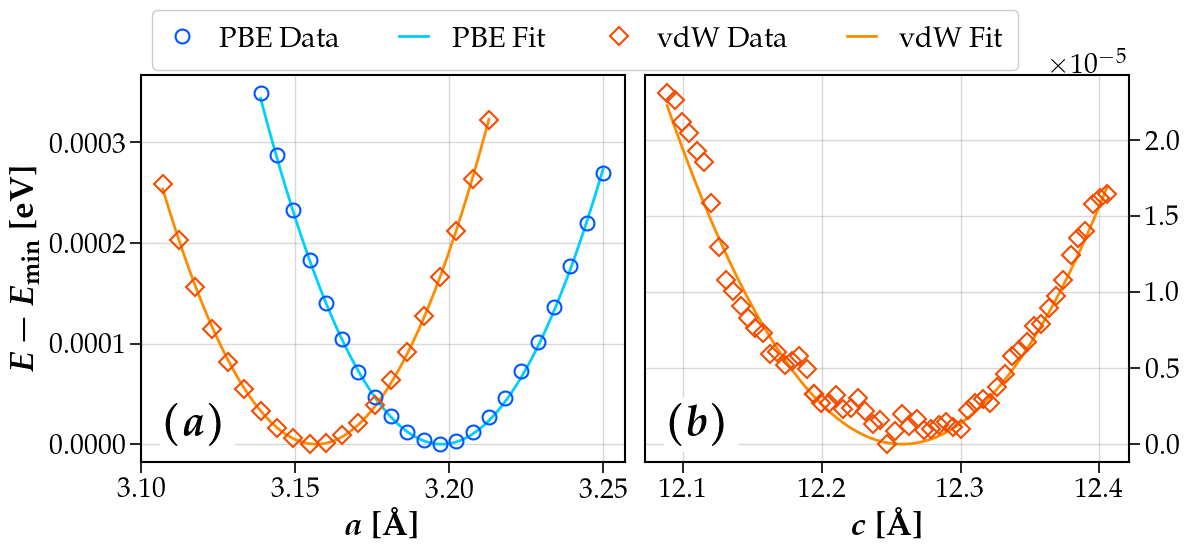

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5.5), sharey=False)

# Optimization w.r.t a
ax1.plot(pbe_a_values, diff_e_pbe, 
         marker='o', color='#0055FF', markersize=10, markerfacecolor='None', markeredgewidth=1.5,
         linestyle='None', label='PBE Data', zorder=3)

ax1.plot(x_pbe, diff_fit_pbe, 
         color='#00CFFF', linestyle='-', linewidth=2, label='PBE Fit', zorder=2)

ax1.plot(vdw_a_values, diff_e_vdw, 
         marker='D', color='#F54C00', markersize=9, markerfacecolor='None', markeredgewidth=1.5,
         linestyle='None', label='vdW Data', zorder=3)

ax1.plot(x_vdw, diff_fit_vdw, 
         color='#FF8C00', linestyle='-', linewidth=2, label='vdW Fit', zorder=2)

ax1.set_xlabel(r'$\boldsymbol{a}\ \textbf{[\AA]}$')
ax1.set_ylabel(r'$\boldsymbol{E - E_{\mathrm{min}}}\ \textbf{[eV]}$')
ax1.grid()
# ax1.legend(loc='upper center', ncol=2) # Removed individual legend

# --- Optimization w.r.t c
# ax2.plot(pbe_c_values, diff_e_pbe_c, 
#          marker='o', color='#0055FF', markersize=10, markerfacecolor='None', markeredgewidth=1.5,
#          linestyle='None', label='PBE Data', zorder=3)
# 
# ax2.plot(x_pbe_c, diff_fit_pbe, # This was diff_fit_pbe, assuming it should be diff_fit_pbe_c if PBE plot for c is enabled
#          color='#00CFFF', linestyle='-', linewidth=2, label='PBE Fit', zorder=2)

ax2.plot(vdw_c_values, diff_e_vdw_c,
         marker='D', color='#F54C00', markersize=9, markerfacecolor='None', markeredgewidth=1.5,
         linestyle='None', label='vdW Data', zorder=3) # Label will be combined

ax2.plot(x_vdw_c, diff_fit_vdw_c,
         color='#FF8C00', linestyle='-', linewidth=2, label='vdW Fit', zorder=2) # Label will be combined

# set ticks and ticklabel positions to right
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax2.set_xlabel(r'$\boldsymbol{c}\ \textbf{[\AA]}$')
ax2.grid()
# ax2.legend(loc='upper center') # Removed individual legend

# Collect handles and labels for common legend
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)

# Add common legend
# Adjust bbox_to_anchor and ncol as needed for desired placement
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.492, 1.075), ncol=4, fontsize=21)

# Add text box (a) (b)
ax1.text(0.05, 0.15, r'$\boldsymbol{(a)}$', transform=ax1.transAxes, fontsize=30, verticalalignment='top', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
ax2.text(0.05, 0.15, r'$\boldsymbol{(b)}$', transform=ax2.transAxes, fontsize=30, verticalalignment='top', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

plt.tight_layout(rect=[0, 0.05, 1, 1]) # Adjust rect to make space for the legend below

plt.savefig("Figures/geometry_optim.pdf", bbox_inches='tight') 

plt.show()

## Band Structure of $\text{MoS}_2$

**Task**: *By using the lattice constants previously obtained (with van der Waals), compute the band structure of MoS2. Where is (in momentum space) the top of the valence band? Where is the bottom of the conduction band? How many inequivalent global minima are present in the lowest conduction band? Is the band gap direct or indirect? How large is it?*

As in the first exercise, we fix the $k$ points density per unit length and compute the distance between consecutive points. 
- K to Γ: 
- Γ to M: 
- M to K: 

We use $a=5.9655$ Bohr and $c=23.1640$ Bohr, meaning celldm(3)=$c/a=3.8830$.

- SCF computation: highest occupied level is $11.0923\text{ eV}$

In [7]:
print(f"c/a = {23.1640 / 5.9655:.4f}")

c/a = 3.8830


In [8]:
Gamma = np.array([0, 0, 0])
K = np.array([1/3, 1/3, 0])
M = np.array([0.5, 0, 0])

K_to_Gamma = np.linalg.norm(K - Gamma)
Gamma_to_M = np.linalg.norm(Gamma - M)
M_to_K = np.linalg.norm(K - M)

n_points = 100
print(f"Distance from K to Gamma: {K_to_Gamma:.4f}, Number of points: {int(n_points * K_to_Gamma)}")
print(f"Distance from Gamma to M: {Gamma_to_M:.4f}, Number of points: {int(n_points * Gamma_to_M)}")
print(f"Distance from K to M: {M_to_K:.4f}, Number of points: {int(n_points * M_to_K)}")
print(f"Total distance: {K_to_Gamma + Gamma_to_M + M_to_K:.4f}")

Distance from K to Gamma: 0.4714, Number of points: 47
Distance from Gamma to M: 0.5000, Number of points: 50
Distance from K to M: 0.3727, Number of points: 37
Total distance: 1.3441


Plotting band structure for celldm(3) = c/a = 3.8830
This corresponds to a vacuum thickness of 12.2703 Bohr
Overall VBM: 0.0003 eV
Overall CBM: 0.8179 eV
Overall Band gap: 0.8176 eV


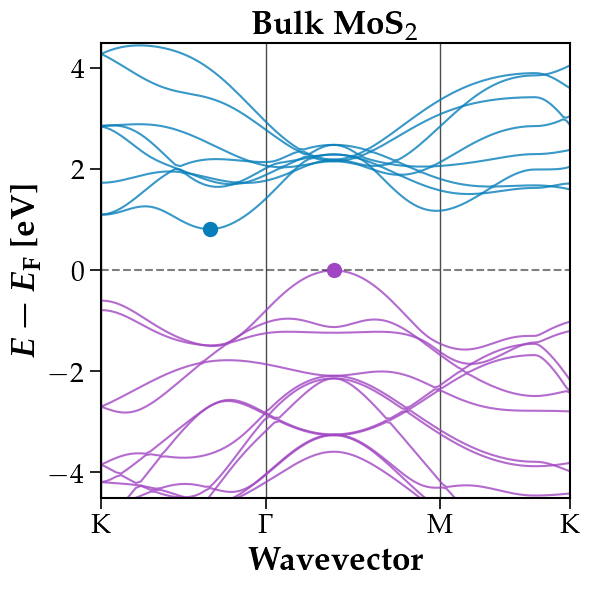

In [9]:
c_over_a_exp = 23.1640 / 5.9655
c = c_over_a_exp * a_exp
print("="*50)
print(f"Plotting band structure for celldm(3) = c/a = {c_over_a_exp:.4f}")
print(f"This corresponds to a vacuum thickness of {c:.4f} Bohr")
print("="*50)

# Load the data
filepath = "bands/MoS2.dat.gnu"
data = np.loadtxt(filepath)
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))
# Define the k-path
Gamma = np.array([0, 0, 0])
K = np.array([1/3, 1/3, 0])
M = np.array([0.5, 0, 0])
K_to_Gamma = np.linalg.norm(K - Gamma)
Gamma_to_M = np.linalg.norm(Gamma - M)
M_to_K = np.linalg.norm(K - M)

k_points = [
    0, 
    K_to_Gamma,
    K_to_Gamma + Gamma_to_M,
    K_to_Gamma + Gamma_to_M + M_to_K
]
labels = [
    r"K",
    r"$\Gamma$",
    r"M",
    r"K"
]
# Find the valence band maxima and conduction band minima
fermi_level_offset = 11.0922
num_bands_to_plot = 60
valence_band_index = 25
conduction_band_index = 26
vbm = np.max(bands[valence_band_index, :])
cbm = np.min(bands[conduction_band_index, :])
band_gap = cbm - vbm
print(f"Overall VBM: {vbm - fermi_level_offset:.4f} eV")
print(f"Overall CBM: {cbm - fermi_level_offset:.4f} eV")
print(f"Overall Band gap: {band_gap:.4f} eV")

vbm_idx = np.argmax(bands[valence_band_index, :])
cbm_idx = np.argmin(bands[conduction_band_index, :])
vbm_k = k[vbm_idx]
cbm_k = k[cbm_idx]

plt.figure(figsize=(6, 6))
for band in range(len(bands)):
    if band < num_bands_to_plot:
        plt.plot(k, bands[band, :] - fermi_level_offset, 
                 linewidth=1.5, 
                 alpha=0.8, 
                 color='#a146c2' if band <= valence_band_index else '#067eba')
        
plt.scatter(vbm_k, vbm - fermi_level_offset, color='#a146c2', s=100, zorder=5, marker='o', label='VBM')
plt.scatter(cbm_k, cbm - fermi_level_offset, color='#067eba', s=100, zorder=5, marker='o', label='CBM')

plt.axhline(y=0, color='k', linestyle='--', linewidth=1.5, alpha=0.5, label='Fermi level')
plt.xlabel(r"$\textbf{Wavevector}$")
plt.title(r"$\textbf{Bulk MoS}_2$")
plt.xticks(k_points, labels)
plt.xlim(0, k_points[-1])
plt.ylabel(r"$\boldsymbol{E - E_{\rm F}}\ \textbf{[eV]}$")
plt.grid(axis='x', linestyle='-', linewidth=1, alpha=0.7, color='k')
plt.grid(axis='y', linestyle='', linewidth=1, alpha=0.5)
plt.ylim(-4.5, 4.5)
plt.tight_layout()
plt.show()

- The top of the valance band is between $\Gamma$ and M.
- The bottom of the conduction band is between $\Gamma$ and K
- The band gap is indirect and ~ 0.81 eV

## Single Layer of $\text{MoS}_2$

**Task**: *We now want to study a single layer of MoS2. In order to simulate the electronic properties of a two-dimensional single layer of MoS2, it is sufficient to account for a sufficiently large distance between layers. Determine an appropriate inter-layer distance to simulate a single layer of Mo2. Compute the band structure of monolayer MoS2. How does it change in comparison with the band structure of bulk MoS2?*

1. Convergence with respect to vacuum thickness: 
    - Total energy convergence
    - Band gap convergence
    - Valence and Conduction bands maxima
2. Band structure calculation
3. Comparative analysis with Bulk MoS2
4. Discussion

In [10]:
# Convergence w.r.t vacuum thickness
c_over_a = np.array([
    60, 50, 40, 30, 20,
    10,  8,  6,  4, 100, 
])

c = c_over_a * a_exp / BOHR

total_energy = np.array([
    -193.42247492, -193.42247772, -193.42247978, -193.42249019, -193.42251115,
    -193.42258561, -193.42255760, -193.42264040, -193.42298818, -193.42247121
])

highest_occupied_energy = np.array([
    -5.6238, -5.5170, -5.3574, -5.0914, -4.5584, 
    -2.9606, -2.1616, -0.8302, 1.8307, -5.8367
])

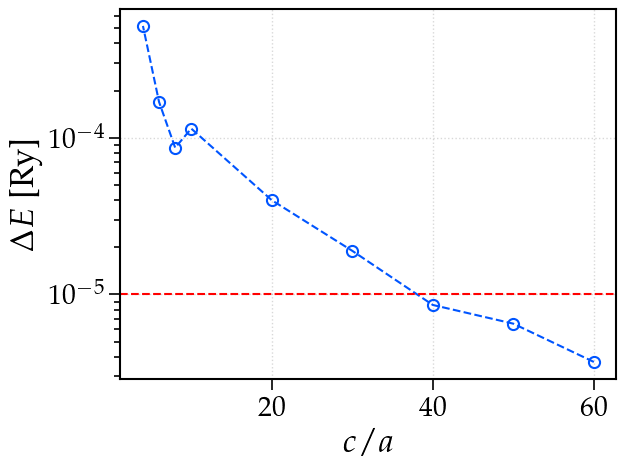

In [11]:
converged_energy = total_energy[-1]
diff_e = np.abs(total_energy - converged_energy)
plt.plot(c_over_a[:-1], diff_e[:-1],
         marker='o', color='#0055FF', markersize=8, 
         markerfacecolor='None', markeredgewidth=1.5,
         linestyle='--')
plt.axhline(y=1e-5, color='r', linestyle='--', label='Convergence threshold')
plt.xlabel(r'$c/a$')
plt.ylabel(r'$\Delta E$ [Ry]')
plt.yscale('log')
plt.grid(True, linestyle=':')
plt.show()

With a $10^{-5}$ Ry convergence threshold, we achieve convergence for $c/a=40$.  

Plotting band structure for celldm(3) = c/a = 40
This corresponds to a vacuum thickness of 238.8000 Bohr
Overall VBM: 0.1047 eV
Overall CBM: 1.8849 eV
Overall Band gap: 1.7802 eV


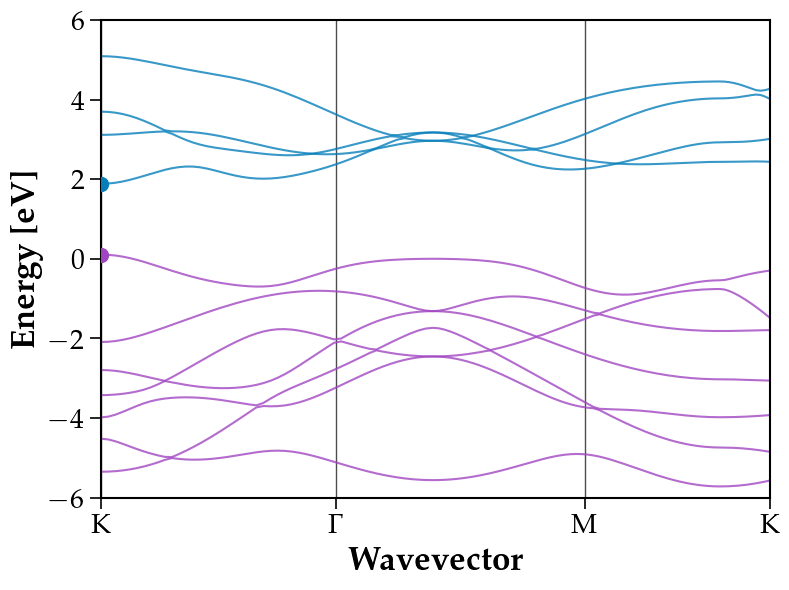

In [12]:
# fermi level corresponding to c/a = 40
idx = np.where(c_over_a == 40)[0][0]
fermi_offset = highest_occupied_energy[idx]
band_gap = plot_single_layer_band_structure(40, fermi_offset)

- We notice a direct band gap of 1.78 eV at point K 

Plotting Bulk MoS2 band structure for celldm(3) = c/a = 3.8830
This corresponds to a c lattice parameter of 12.2703 Angstrom (using a_exp for scaling)
Bulk VBM: 0.0003 eV
Bulk CBM: 0.8179 eV
Bulk Band gap: 0.8176 eV
Plotting Single Layer MoS2 band structure for celldm(3) = c/a = 40
This corresponds to a c lattice parameter of 238.8000 Bohr (using a_sl)
Single Layer VBM: 0.1047 eV
Single Layer CBM: 1.8849 eV
Single Layer Band gap: 1.7802 eV


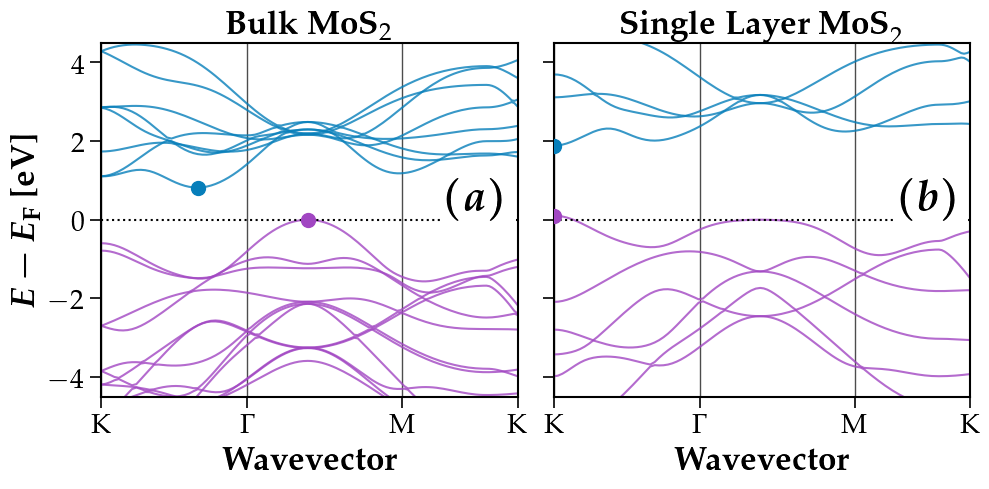

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True) # sharey can be True if y-scales are comparable

# --- Plot 1: Bulk MoS2 ---
c_over_a_exp = 23.1640 / 5.9655
# a_exp needs to be defined, assuming it's available from previous cells (e.g., a_exp = 3.16)
# If a_exp is not defined in this scope, you'll need to ensure it is.
# For this example, I'll assume a_exp = 3.16 as per earlier cells.
a_exp = 3.16 # Angstroms
c_bulk = c_over_a_exp * a_exp
print("="*50)
print(f"Plotting Bulk MoS2 band structure for celldm(3) = c/a = {c_over_a_exp:.4f}")
print(f"This corresponds to a c lattice parameter of {c_bulk:.4f} Angstrom (using a_exp for scaling)")
print("="*50)

# Load the data for Bulk
filepath_bulk = "bands/MoS2.dat.gnu"
data_bulk = np.loadtxt(filepath_bulk)
k_bulk = np.unique(data_bulk[:, 0])
bands_bulk = np.reshape(data_bulk[:, 1], (-1, len(k_bulk)))

# Define the k-path (assuming it's the same for both plots)
Gamma = np.array([0, 0, 0])
K = np.array([1/3, 1/3, 0])
M = np.array([0.5, 0, 0])
K_to_Gamma = np.linalg.norm(K - Gamma)
Gamma_to_M = np.linalg.norm(Gamma - M)
M_to_K = np.linalg.norm(K - M)

k_points = [
    0,
    K_to_Gamma,
    K_to_Gamma + Gamma_to_M,
    K_to_Gamma + Gamma_to_M + M_to_K
]
labels = [
    r"K",
    r"$\Gamma$",
    r"M",
    r"K"
]

# Fermi level and band indices for Bulk
fermi_level_offset_bulk = 11.0922
num_bands_to_plot = 60 # Can be adjusted
valence_band_index_bulk = 25
conduction_band_index_bulk = 26

vbm_bulk = np.max(bands_bulk[valence_band_index_bulk, :])
cbm_bulk = np.min(bands_bulk[conduction_band_index_bulk, :])
band_gap_bulk = cbm_bulk - vbm_bulk
print(f"Bulk VBM: {vbm_bulk - fermi_level_offset_bulk:.4f} eV")
print(f"Bulk CBM: {cbm_bulk - fermi_level_offset_bulk:.4f} eV")
print(f"Bulk Band gap: {band_gap_bulk:.4f} eV")

vbm_idx_bulk = np.argmax(bands_bulk[valence_band_index_bulk, :])
cbm_idx_bulk = np.argmin(bands_bulk[conduction_band_index_bulk, :])
vbm_k_bulk = k_bulk[vbm_idx_bulk]
cbm_k_bulk = k_bulk[cbm_idx_bulk]

for band in range(len(bands_bulk)):
    if band < num_bands_to_plot:
        ax1.plot(k_bulk, bands_bulk[band, :] - fermi_level_offset_bulk,
                 linewidth=1.5,
                 alpha=0.8,
                 color='#a146c2' if band <= valence_band_index_bulk else '#067eba')

ax1.scatter(vbm_k_bulk, vbm_bulk - fermi_level_offset_bulk, color='#a146c2', s=100, zorder=5, marker='o', label='VBM')
ax1.scatter(cbm_k_bulk, cbm_bulk - fermi_level_offset_bulk, color='#067eba', s=100, zorder=5, marker='o', label='CBM')
ax1.axhline(y=0, color='k', linestyle=':', linewidth=1.5, alpha=1, label='Fermi level')
ax1.set_xlabel(r"$\textbf{Wavevector}$")
ax1.set_title(r"$\textbf{Bulk MoS}_2$")
ax1.set_xticks(k_points)
ax1.set_xticklabels(labels)
ax1.set_xlim(0, k_points[-1])
ax1.set_ylabel(r"$\boldsymbol{E - E_{\rm F}}\ \textbf{[eV]}$")
ax1.grid(axis='x', linestyle='-', linewidth=1, alpha=0.7, color='k')
ax1.set_ylim(-4.5, 4.5)

# --- Plot 2: Single Layer MoS2 ---
celldm_3_sl = 40
a_sl = 5.97 # Bohr
c_sl = a_sl * celldm_3_sl
fermi_sl = -5.3574
print("="*50)
print(f"Plotting Single Layer MoS2 band structure for celldm(3) = c/a = {celldm_3_sl}")
print(f"This corresponds to a c lattice parameter of {c_sl:.4f} Bohr (using a_sl)")
print("="*50)

filepath_sl = "single_layer/celldm(3) variation/"
data_sl = np.loadtxt(filepath_sl + "MoS2_" + str(celldm_3_sl) + ".dat.gnu")
k_sl = np.unique(data_sl[:, 0])
bands_sl = np.reshape(data_sl[:, 1], (-1, len(k_sl)))

# Fermi level offset for single layer - assuming it might be different or needs to be defined
# Using fermi_level_offset_bulk for now, but you might have a specific one for single layer
# e.g., fermi_offset_sl = highest_occupied_energy[idx] from your previous cell
# For this example, let's assume you have fermi_offset_sl defined from a previous cell.
# If not, you need to define it. I'll use the bulk one as a placeholder if it's not found.
try:
    fermi_level_offset_sl = fermi_sl 
except NameError:
    print("Warning: 'fermi_offset' for single layer not found, using bulk Fermi offset as placeholder.")
    fermi_level_offset_sl = fermi_level_offset_bulk


valence_band_index_sl = 12 # As per your original code for single layer
conduction_band_index_sl = 13 # As per your original code for single layer

vbm_sl = np.max(bands_sl[valence_band_index_sl, :])
cbm_sl = np.min(bands_sl[conduction_band_index_sl, :])
band_gap_sl = cbm_sl - vbm_sl
print(f"Single Layer VBM: {vbm_sl - fermi_level_offset_sl:.4f} eV")
print(f"Single Layer CBM: {cbm_sl - fermi_level_offset_sl:.4f} eV")
print(f"Single Layer Band gap: {band_gap_sl:.4f} eV")

vbm_idx_sl = np.argmax(bands_sl[valence_band_index_sl, :])
cbm_idx_sl = np.argmin(bands_sl[conduction_band_index_sl, :])
vbm_k_sl = k_sl[vbm_idx_sl]
cbm_k_sl = k_sl[cbm_idx_sl]

# Define colors explicitly if valence_band_color and conduction_band_color are not defined
valence_band_color_sl = '#a146c2'
conduction_band_color_sl = '#067eba'

for band in range(len(bands_sl)):
    if band < num_bands_to_plot: # Use the same num_bands_to_plot or a specific one for SL
        ax2.plot(k_sl, bands_sl[band, :] - fermi_level_offset_sl,
                 linewidth=1.5,
                 alpha=0.8,
                 color=valence_band_color_sl if band <= valence_band_index_sl else conduction_band_color_sl)

ax2.scatter(vbm_k_sl, vbm_sl - fermi_level_offset_sl, color=valence_band_color_sl, s=100, zorder=5, marker='o', label='VBM')
ax2.scatter(cbm_k_sl, cbm_sl - fermi_level_offset_sl, color=conduction_band_color_sl, s=100, zorder=5, marker='o', label='CBM')
ax2.axhline(y=0, color='k', linestyle=':', linewidth=1.5, alpha=1, label='Fermi level') # Optional for second plot if y-axis is shared and already has it
ax2.set_xlabel(r"$\textbf{Wavevector}$")
ax2.set_title(r"$\textbf{Single Layer MoS}_2$")
ax2.set_xticks(k_points)
ax2.set_xticklabels(labels)
ax2.grid(axis='x', linestyle='-', linewidth=1, alpha=0.7, color='k')
ax2.set_xlim(0, k_points[-1])

# add (a) and (b) labels
ax1.text(0.828, 0.62, r'$\boldsymbol{(a)}$', transform=ax1.transAxes, fontsize=30, verticalalignment='top', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
ax2.text(0.832, 0.62, r'$\boldsymbol{(b)}$', transform=ax2.transAxes, fontsize=30, verticalalignment='top', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

plt.tight_layout()

plt.savefig("Figures/band_structure_bulk_vs_single_layer.pdf", bbox_inches='tight')
plt.show()